### Codigo para la propagación de onda elástica 2D PSV en un medio heterogeneo mediante el esquema velocidad - esfuerzo y rejilla escalonada
En este Notebook se presenta un codigo para la propagación de onda elástica 2D PSV en un medio heterogeneo de dos capas mediante el esquema velocidad - esfuerzo y rejilla escalonada propuesto por Virieux (1986), como resultado se muestra en la figura 1 el modelo de velocidad de la onda P, en la figura 2 el modelo de velocidad de la onda S, en la figura 3 el modelo de densidad, en la figura 4 se muestra la ondicula propagada y en la figura 5 cuatro cuadros donde se muestra el avance de la onda P mediante la divergencia, la onda S mediante el rotor y las velocidades $v_x$ y $v_z$, en la figura 6 se muestra el shot gather para la componente $v_x$ y en la la figura 7 se muestra el shot gather para la componente $v_z$

#### Termino o función fuente

En este codigo se uso como función fuente se uso una ondicula  cuya ecuación es:

$$
s= exp\left(-f_0^2*((t-t_0)*dt)^2\right)
$$

donde $f_0$ es la frecuencia dominante y $t_0$ es el retraso en tiempo

In [14]:
# Import Libraries 
# ----------------------------------------------
%matplotlib notebook
import numpy as np
import numpy.matlib as npmat
import matplotlib.pyplot as plt

In [15]:
def d(comp,inpu,dire):
    if(comp=='x'): idim = 0
    elif(comp=='z'): idim = 1
    
    if(dire == '+'):
        return (9/8*(np.roll(inpu, -1, axis = idim)-inpu)
                -1/24*(np.roll(inpu, -2, axis = idim)-np.roll(inpu, 1, axis = idim)))/dx
    elif(dire == '-'):
        return (9/8*(inpu - np.roll(inpu, 1, axis = idim))
                -1/24*(np.roll(inpu, -1, axis = idim)-np.roll(inpu, 2, axis = idim)))/dx

In [16]:
# Input Parameter
# ----------------------------------------------

# Discretization
c1=20           # Number of grid points per dominant wavelength
c2=0.50          # CFL-Number
nx=1400          # number of grid points in x-direction
nz=1400          # number of grid points in z-direction
Tt= 0.73
idisp = 50 # display frequency

# The grid number of pml
pml = 200                              
m = nx + 2*pml
n = nz + 2*pml
 
# Source Signal
f0= 50      # Center frequency Ricker-wavelet
t0= 1.5/f0
q0= 1      # Maximum amplitude Ricker-Wavelet
xscr = int(m/2)-1;  zscr = pml+6 # Source position (in grid points)

In [17]:
# Velocity and density
Vpp=3962*np.ones((nx,nz))   # P-wave velocity in m/s
Vss=2926*np.ones((nx,nz))   # S-wave velocity in m/s
den= 2870*np.ones((nx,nz))       # Density in Kg/m^3
eps = 0.055*np.ones((nx,nz))
delt = -0.089*np.ones((nx,nz))

Vpp[:,0:200]= 1058
Vss[:,0:200]= 387
den[:,0:200]= 1800
eps[:,0:200]= 0
delt[:,0:200]= 0

for j in range(3*(nz//4)-1,nz):
    Vpp[:,j]=4476
    
for j in range(3*(nz//4)-1,nz):
    Vss[:,j]=2814
   
for j in range(3*(nz//4)-1,nz):
    den[:,j]=2500

for j in range(3*(nz//4)-1,nz):
    eps[:,j]=0.097
    
for j in range(3*(nz//4)-1,nz):
    delt[:,j]=0.091   

In [18]:
# Plotting velocity and density model
plt.ion()
fig1 = plt.figure()
plt.title('P-wave Velocity Model (m/s)')
plt.xlabel('x-grid')
plt.ylabel('z-grid')
im = plt.imshow(Vpp.transpose(),vmin=Vpp.min(), vmax=Vpp.max(), animated=True,interpolation="nearest", cmap=plt.cm.RdBu)
fig1.colorbar(im)

fig2 = plt.figure()
plt.title('S-wave Velocity Model (m/s)')
plt.xlabel('x-grid')
plt.ylabel('z-grid')
im = plt.imshow(Vss.transpose(),vmin=Vss.min(), vmax=Vss.max(), animated=True,interpolation="nearest", cmap=plt.cm.RdBu)
fig2.colorbar(im)

fig3 = plt.figure()
plt.title('Density Model (Kg/$m^3$)')
plt.xlabel('x-grid')
plt.ylabel('z-grid')
im = plt.imshow(den.transpose(),vmin=den.min(), vmax=den.max(), animated=True,interpolation="nearest", cmap=plt.cm.RdBu)
fig3.colorbar(im)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# PML extra edge

Vp=np.zeros((m,n))                        # medium velocity of P wave,m/s,zero fill
Vp[pml:pml+nx,pml:pml+nz] = Vpp
Vp[pml:pml+nx,0:pml] = np.transpose(npmat.repmat(Vpp[:,0],pml,1))
Vp[pml:pml+nx,nz+pml:2*pml+nz] = np.transpose(npmat.repmat(Vpp[:,nz-1],pml,1))
Vp[0:pml,:] = npmat.repmat(Vp[pml,:],pml, 1)
Vp[pml+nx:2*pml+nx,:] = npmat.repmat(Vp[pml+nx-1,:],pml, 1)
del Vpp

Vs=np.zeros((m,n))                        # medium velocity of S wave,m/s,zero fill
Vs[pml:pml+nx,pml:pml+nz] = Vss
Vs[pml:pml+nx,0:pml] = np.transpose(npmat.repmat(Vss[:,0],pml,1))
Vs[pml:pml+nx,nz+pml:nz+2*pml] = np.transpose(npmat.repmat(Vss[:,nz-1],pml,1))
Vs[0:pml,:] = npmat.repmat(Vs[pml,:],pml, 1)
Vs[pml+nx:2*pml+nx,:] = npmat.repmat(Vs[pml+nx-1,:],pml, 1)
del Vss;

rho=np.zeros((m,n))                        # medium density,kg/m**3,zero fill
rho[pml:pml+nx,pml:pml+nz] = den;
rho[pml:pml+nx,0:pml] = np.transpose(npmat.repmat(den[:,0],pml,1))
rho[pml:pml+nx,nz+pml:nz+2*pml] = np.transpose(npmat.repmat(den[:,nz-1],pml,1))
rho[0:pml,:] = npmat.repmat(rho[pml,:],pml, 1)
rho[pml+nx:2*pml+nx,:] =npmat.repmat(rho[pml+nx-1,:],pml,1)
del den

epsilon=np.zeros((m,n))                        # medium density,kg/m**3,zero fill
epsilon[pml:pml+nx,pml:pml+nz] = eps;
epsilon[pml:pml+nx,0:pml] = np.transpose(npmat.repmat(eps[:,0],pml,1))
epsilon[pml:pml+nx,nz+pml:nz+2*pml] = np.transpose(npmat.repmat(eps[:,nz-1],pml,1))
epsilon[0:pml,:] = npmat.repmat(epsilon[pml,:],pml, 1)
epsilon[pml+nx:2*pml+nx,:] =npmat.repmat(epsilon[pml+nx-1,:],pml,1)
del eps

delta=np.zeros((m,n))                        # medium density,kg/m**3,zero fill
delta[pml:pml+nx,pml:pml+nz] = delt;
delta[pml:pml+nx,0:pml] = np.transpose(npmat.repmat(delt[:,0],pml,1))
delta[pml:pml+nx,nz+pml:nz+2*pml] = np.transpose(npmat.repmat(delt[:,nz-1],pml,1))
delta[0:pml,:] = npmat.repmat(delta[pml,:],pml, 1)
delta[pml+nx:2*pml+nx,:] =npmat.repmat(delta[pml+nx-1,:],pml,1)
del delt

# Calculate Thomsen Parameters
C33 = Vp**2*rho
C44 = Vs**2*rho
C11 = C33*(2*epsilon + 1)
C66 = C44*(2*epsilon + 1)
C13 = np.sqrt(2*C33*(C33-C44)*delta + (C33-C44)**2) - C44
del Vs

In [20]:
## Preparation 

# Init wavefields
vx=np.zeros((m,n))
vz=np.zeros((m,n))
sxx=np.zeros((m,n))
szz=np.zeros((m,n))
sxz=np.zeros((m,n))
vx1=np.zeros((m,n))
vx2=np.zeros((m,n))
vz1=np.zeros((m,n))
vz2=np.zeros((m,n))
sxx1=np.zeros((m,n))
sxx2=np.zeros((m,n))
szz1=np.zeros((m,n))
szz2=np.zeros((m,n))
sxz1=np.zeros((m,n))
sxz2=np.zeros((m,n))

#vol   = np.zeros([nx,nz])
#curl  = np.zeros([nx,nz])

cmin=Vp.min()  # Lowest P-wave velocity
cmax=Vp.max()  # Highest P-wave velocity
fmax=2*f0              # Maximum frequency
dx=cmin/(fmax*c1)      # Spatial discretization (in m)
dz=dx 
dt=dx/(cmax)*c2        # Temporal discretization (in s)
lampda_min=cmin/fmax   # Smallest wavelength
del Vp

# Create space and time vector
x=np.arange(0,dx*nx-dx,dx) # Space vector
z=np.arange(0,(dz*nz-dz),dz) # Space vector
t=np.arange(0,(Tt-dt),dt)    # Time vector
nt=len(t)       # Number of time steps

seismo_vx=np.zeros((m,nt))
seismo_vz=np.zeros((m,nt))

In [21]:
# Source signal - Ricker-wavelet
#tau=np.pi*f0*(t-1.5/f0)
#q=q0*(1-2*tau**2)*np.exp(-tau**2)

# Initialise source
#s = np.zeros(nt)
#t0 = 3. * aa/dt
#for i in range(1,nt+1):
#    s[i-1]= np.exp(- 1./aa**2*((i-t0)*dt)**2)
#print(' %r <source< %r' %(s.min(),s.max()))

# Initialise source
tau=np.pi*f0*(t-t0);
s=q0*(1-2*tau**2)*np.exp(-tau**2);

# Plotting source signal
plt.ion()
fig4 = plt.figure(figsize=(9,4.5))
plt.plot(t,s)
plt.title('Source signal Ricker-Wavelet')
plt.xlabel('Time in s')
plt.ylabel('Amplitude')
plt.show()

<IPython.core.display.Javascript object>

In [22]:
# Attenuation(pml)
R=1e-60;          # theoretical reflection coefficient
ddx=np.zeros((m,n)) 
ddz=np.zeros((m,n))
plx=pml*dx
plz=pml*dz
for i in range(0,m):
     for k in range(0,n):
         # zome1
         if i>=0 and i<=pml-1 and k>=0 and k<=pml-1:
             z=pml-k;x=pml-i;
             ddz[i,k]=-np.log(R)*4*cmax*z**4/(2*plz**5);
             ddx[i,k]=-np.log(R)*4*cmax*x**4/(2*plx**5);
         elif i>=0 and i<=pml-1 and k>n-pml-1 and k<=n:
             z=k-(n-pml);x=pml-i;
             ddz[i,k]=-np.log(R)*4*cmax*z**4/(2*plz**5);
             ddx[i,k]=-np.log(R)*4*cmax*x**4/(2*plx**5);
         elif i>m-pml-1 and i<=m and k>=0 and k<=pml-1:
             z=pml-k;x=i-(m-pml);
             ddz[i,k]=-np.log(R)*4*cmax*z**4/(2*plz**5);
             ddx[i,k]=-np.log(R)*4*cmax*x**4/(2*plx**5);
         elif i>m-pml-1 and i<=m and k>n-pml-1 and k<=n:
             z=k-(n-pml);x=i-(m-pml);
             ddz[i,k]=-np.log(R)*4*cmax*z**4/(2*plz**5);
             ddx[i,k]=-np.log(R)*4*cmax*x**4/(2*plx**5);
  
         # xone2
         elif i<=pml-1 and k>pml-1 and k<n-pml:
             z=0;x=pml-i;
             ddz[i,k]=0;
             ddx[i,k]=-np.log(R)*4*cmax*x**4/(2*plx**5);
         elif  i>m-pml-1 and i<=m and k>pml-1 and k<=n-pml-1:
             z=0;x=i-(m-pml);
             ddz[i,k]=0;
             ddx[i,k]=-np.log(R)*4*cmax*x**4/(2*plx**5);
         # xome3
         elif i>pml-1 and i<=m-pml-1 and k<=pml-1:
             z=pml-k;x=0;
             ddz[i,k]=-np.log(R)*4*cmax*z**4/(2*plz**5);
             ddx[i,k]=0;
         elif i>pml-1 and i<=m-pml-1 and k>n-pml-1 and k<=n:
             z=k-(n-pml);x=0;
             ddz[i,k]=-np.log(R)*4*cmax*z**4/(2*plz**5);
             ddx[i,k]=0;

<IPython.core.display.Javascript object>


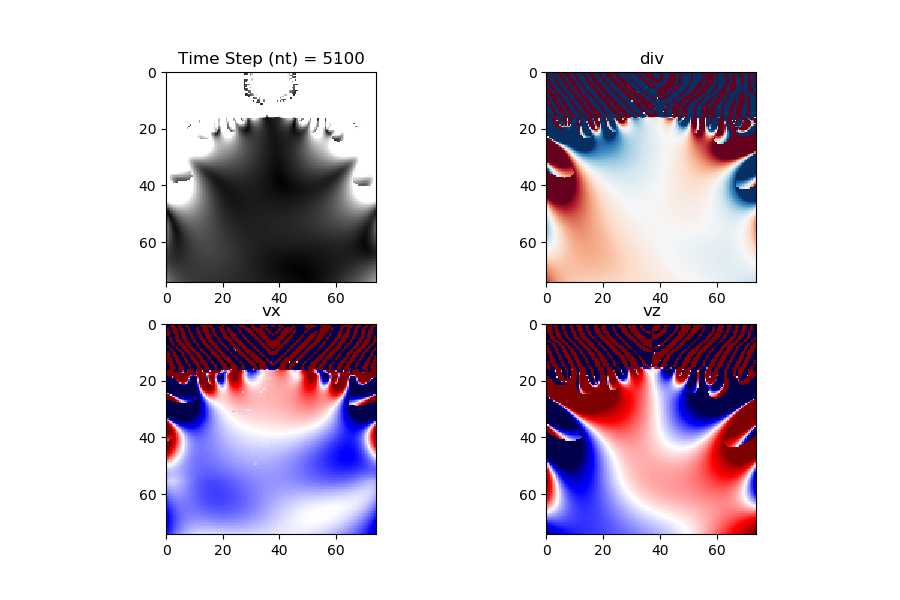

In [23]:
# Plot preparation
# Initialize animated plot
plt.ion()
fig5 = plt.figure(figsize=(9,6))
f1 = fig5.add_subplot(2, 2, 1)
f2 = fig5.add_subplot(2, 2, 2)
f3 = fig5.add_subplot(2, 2, 3)
f4 = fig5.add_subplot(2, 2, 4)
f1.set_title('curl')
f2.set_title('div')
f3.set_title('vx')
f4.set_title('vz')

curlp = f1.imshow((np.sqrt(vx[pml:m-pml,pml:n-pml]**2+vz[pml:m-pml,pml:n-pml]**2)).transpose(), interpolation='nearest', 
                  animated=True,vmin=0, vmax=1.0e-10, cmap='gray',extent=[0,(m-2*pml)*dx,(n-2*pml)*dz,0],aspect = 'equal')
divp = f2.imshow((vx[pml:m-pml,pml:n-pml]+vz[pml:m-pml,pml:n-pml]).transpose(), interpolation='nearest', animated=True,
                   vmin=-1.0e-10, vmax=1.0e-10, cmap=plt.cm.RdBu,extent=[0,(m-2*pml)*dx,(n-2*pml)*dz,0],aspect = 'equal')
vxp = f3.imshow(vx[pml:m-pml,pml:n-pml].transpose(), interpolation='nearest', animated=True,
                   vmin=-5.0e-11, vmax=5.0e-11, cmap='seismic',extent=[0,(m-2*pml)*dx,(n-2*pml)*dz,0],aspect = 'equal')
vzp = f4.imshow(vz[pml:m-pml,pml:n-pml].transpose(), interpolation='nearest', animated=True,
                   vmin=-5.0e-11, vmax=5.0e-11, cmap='seismic',extent=[0,(m-2*pml)*dx,(n-2*pml)*dz,0],aspect = 'equal')

# Plot the receivers
#for x, z in zip(irx, irz):
#    plt.text(x, z, '+')

#plt.plot(zscr, xscr, 'r*', markersize=11)
#plt.colorbar()
#plt.xlabel('ix')
#plt.ylabel('iz')
plt.show()


In [24]:
for tt in range(1,nt):

    # Inject source wavelet (explosion)
      
    sxx[xscr,zscr]=sxx[xscr,zscr]+s[tt]   
    szz[xscr,zscr]=szz[xscr,zscr]+s[tt]
    
    #sxx[:,0] = 0.
    #szz[:,0] = 0.
    #sxz[:,0] = 0.
    #sxx[:,nz-1] = 0.
    #szz[:,nz-1] = 0.
    #sxz[:,nz-1] = 0.
    
    # Free surface
    szz[:,pml-1]=0.
    sxz[:,pml-1]=0.
    
    # Update velocity
    vx1=((1-0.5*dt*ddx)*vx1+(dt/rho)*d('x',sxx,'-'))/(1+0.5*dt*ddx)  
    vx2=((1-0.5*dt*ddz)*vx2+(dt/rho)*d('z',sxz,'-'))/(1+0.5*dt*ddz)
    vx = vx1+vx2
    
    vz1=((1-0.5*dt*ddx)*vz1+(dt/rho)*d('x',sxz,'+'))/(1+0.5*dt*ddx)
    vz2=((1-0.5*dt*ddz)*vz2+(dt/rho)*d('z',szz,'+'))/(1+0.5*dt*ddz)
    vz = vz1+vz2 
    
            
    #curl = d('z',vx,'+') - d('x',vz,'-')
    #vol = d('x',vx,'+') + d('z',vz,'-')            
                       
    # Update pressure
    sxx1=((1-0.5*dt*ddx)*sxx1+C11*dt*d('x',vx,'+'))/(1+0.5*dt*ddx)
    sxx2=((1-0.5*dt*ddz)*sxx2+C13*dt*d('z',vz,'-'))/(1+0.5*dt*ddz)
    sxx = sxx1 + sxx2    

    szz1=((1-0.5*dt*ddx)*szz1+C13*dt*d('x',vx,'+'))/(1+0.5*dt*ddx)
    szz2=((1-0.5*dt*ddz)*szz2+C33*dt*d('z',vz,'-'))/(1+0.5*dt*ddz) 
    szz = szz1+szz2 

    sxz1=((1-0.5*dt*ddx)*sxz1+C44*dt*d('x',vz,'-'))/(1+0.5*dt*ddx)
    sxz2=((1-0.5*dt*ddz)*sxz2+C44*dt*d('z',vx,'+'))/(1+0.5*dt*ddz)
    sxz = sxz1+sxz2    
          
    # Update velocity
    #vx=vx+(dt/rho)*(d('x',sxx,'+') + d('z',sxz,'-'))
    #vz=vz+(dt/rho)*(d('x',sxz,'-') + d('z',szz,'+'))
            
#    curl = d('z',vx,'+') - d('x',vz,'-')
#    vol = d('x',vx,'+') + d('z',vz,'-')            
                       
    # Update pressure

    #sxx=sxx + dt*C11*d('x',vx,'-') + dt*C13*d('z',vz,'-')  
    #szz=szz + dt*C13*d('x',vx,'-') + dt*C33*d('z',vz,'-')
    #sxz=sxz + dt*C44*(d('z',vx,'+') + d('x',vz,'+'))  
    
    seismo_vx[0:m,tt]=vx[0:m,pml]
    seismo_vz[0:m,tt]=vz[0:m,pml]
                
        # Plot every time step (nt)
    if (tt % idisp) == 0:
        #plt.title('Time Step (nt) = %d' % n)    
        curlp.set_data((np.sqrt(vx[pml:m-pml,pml:n-pml]**2+vz[pml:m-pml,pml:n-pml]**2)).transpose())
        f1.set_title("Time Step (nt) = %i" % (tt))
        divp.set_data((vx[pml:m-pml,pml:n-pml]+vz[pml:m-pml,pml:n-pml]).transpose())
        vxp.set_data(vx[pml:m-pml,pml:n-pml].transpose())
        vzp.set_data(vz[pml:m-pml,pml:n-pml].transpose())
        plt.gcf().canvas.draw()
        

KeyboardInterrupt: 

In [ ]:
# Plot Shot gathers 5 pts below free surface
    
fac=0.05
ymx=abs(seismo_vx).max()
clim=np.array([-fac*ymx, fac*ymx])
plt.ion()
fig2 = plt.figure()
plt.title('Common Shot Gather (horizontal component phone)')
plt.xlabel('x-grid')
plt.ylabel('nt')
im = plt.imshow(seismo_vx[pml:m-pml,:].transpose(),vmin=clim.min(), vmax=clim.max(), animated=True,
                interpolation="nearest", cmap='seismic',extent=[0,(m-2*pml)*dx,nt*dt - t0,0],aspect = 'auto')
fig2.colorbar(im)
plt.show()
plt.savefig("DFDT_het_2D_vx.png", bbox_inches='tight')

fac=0.025
ymx=abs(seismo_vz[pml:m-pml,:]).max()
clim=np.array([-fac*ymx, fac*ymx])
plt.ion()
fig3 = plt.figure()
plt.title('Common Shot Gather (vertical component phone)')
plt.xlabel('x-grid')
plt.ylabel('nt')
im = plt.imshow(seismo_vz[pml:m-pml,:].transpose(),vmin=clim.min(), vmax=clim.max(), animated=True,
                interpolation="nearest", cmap='seismic',extent=[0,(m-2*pml)*dx,nt*dt - t0,0],aspect = 'auto')
fig3.colorbar(im)
plt.show()